In [2]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
train = pd.read_csv('C:\\Users\\Cameron\\Documents\\GitHub\\Moonlight\\CP322-MNIST\\mnist_train.csv')
test = pd.read_csv('C:\\Users\\Cameron\\Documents\\GitHub\\Moonlight\\CP322-MNIST\\mnist_test.csv')

# Display the first few rows of the DataFrame
train.head()


C:\Users\Cameron\AppData\Local\Temp\ipykernel_21864\3462127714.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Filter the data for classes 0 to 4
train_filtered = train[train['label'].isin(range(5))]

# Split the data into features and target
X = train_filtered.drop('label', axis=1)
y = train_filtered['label']

# Split the train data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the classifier
clf = MLPClassifier(hidden_layer_sizes=(16, 32), alpha=0.01, max_iter=1000, batch_size=100)

# Train the classifier
clf.fit(X_train, y_train)

# Prepare the test data
test = test[test['label'].isin(range(5))]
test = test.drop('label', axis=1)

# Test the classifier
y_pred = clf.predict(test)


Training error: 0.00926060429982567
Validation error: 0.028431372549019618


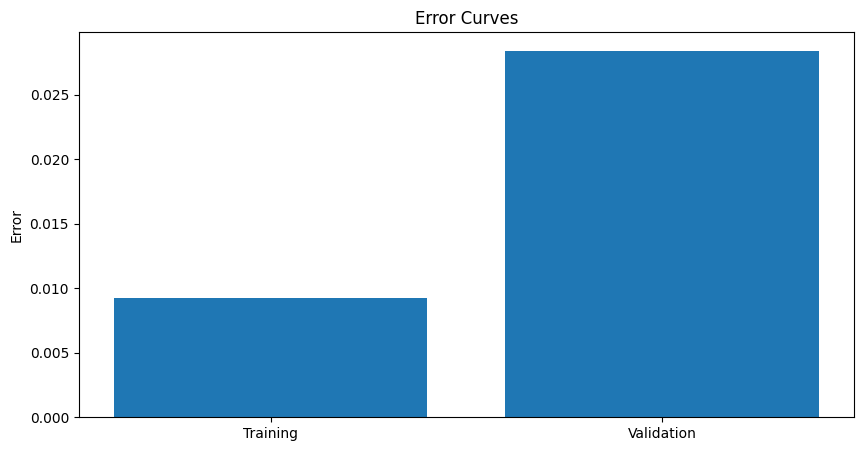

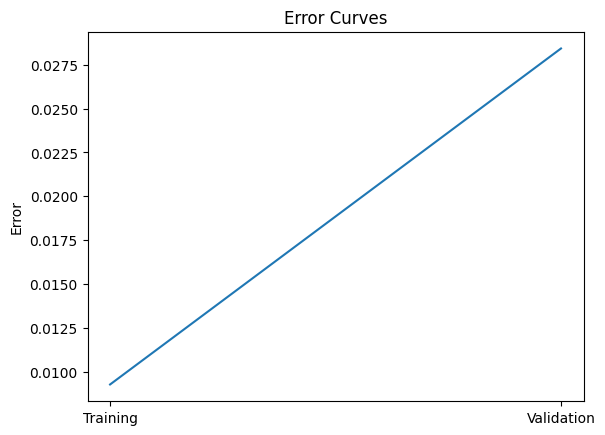

In [7]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate training error
train_pred = clf.predict(X_train)
train_error = 1 - accuracy_score(y_train, train_pred)

# Calculate validation error
validation_pred = clf.predict(X_validation)
validation_error = 1 - accuracy_score(y_validation, validation_pred)

# Print the errors
print(f'Training error: {train_error}')
print(f'Validation error: {validation_error}')

# Plot the error curves
plt.figure(figsize=(10, 5))
plt.bar(['Training', 'Validation'], [train_error, validation_error])

plt.ylabel('Error')
plt.title('Error Curves')
plt.show()
